In [1]:
# Librerías para datos
import pandas as pd
import numpy as np

# Librerías de imputación
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Habilita IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df_mer= pd.read_csv("merchant_fill_nonulls.csv")
df_mer.sample(5)

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
1554,1554,50 pcs mignon été étanche autocollants jaune b...,5.00,5,1000,No,4.64,377,No,Excelente,No,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",Unknown,H01,Livraison standard,2,No,35,50,CN,zzbllss,Unknown,2904,592968ba63950d682ca4b195,https://www.wish.com/c/5d6a0d55976cd02993e43250,5d6a0d55976cd02993e43250,1,1000,1000.0,4.423,2904.0,5.00,5.00,377.0,0.00,Buena,52.0,19.0,6.0,7.0,293.0
1094,1094,2020 Plus La Taille S-5XL Dames À Manches Cour...,9.00,8,100,No,3.70,27,No,Buena,No,"Jeans,Plus Size,Sleeve,Summer,Dress,Denim,summ...",blue,M.,Livraison standard,3,No,81,50,CN,fy251,85 % avis positifs,104,5d3e6e0ce13a7e7ae9f35f74,https://www.wish.com/c/5e6f204282e6d6b567d051d7,5e6f204282e6d6b567d051d7,2,200,100.0,3.894,104.0,9.00,8.00,27.0,12.50,Regular,4.0,6.0,5.0,1.0,11.0
1059,1059,Femmes Maillot de bain une pièce Maillots de b...,6.00,34,1000,No,3.41,106,No,Buena,No,"bathing suit,Fashion,sexy bra,onepiece,sexy bi...",pink,S,Livraison standard,2,No,43,50,CN,dawtgkaopai,Unknown,2044,5ae7cee3a71fbf0725de5d43,https://www.wish.com/c/5ccaadf547634f48ae1daf8c,5ccaadf547634f48ae1daf8c,4,2200,550.0,4.003,2044.0,5.89,21.50,84.0,-82.35,Buena,19.0,22.0,14.0,16.0,35.0
524,524,Femmes d'été nouvelle mode sans manches à pois...,9.00,34,100,Si,3.14,28,No,Buena,No,"Mini,Fashion,Summer,Tops,Loose,Polkas,V-neck,C...",navyblue,XS,Livraison standard,3,No,40,50,CN,rosewiner,73 % avis positifs,1472,56498ab42a6bdb4474afa47b,https://www.wish.com/c/5eb0db681c4b1c25486d2e7e,5eb0db681c4b1c25486d2e7e,2,200,100.0,3.535,1472.0,9.00,34.00,28.0,-73.53,Regular,6.0,3.0,4.0,7.0,8.0
332,332,Tissu taille formateur gilet chaud shaper été ...,5.66,6,100,No,3.08,13,No,Buena,No,"slimming,wasitcincher,Fashion,waistgirdle,slim...",black,S,Expediere Standard,2,No,35,50,CN,sklioppp,86% Feedback pozitiv,2782,583da4b58108913e6c79a32e,https://www.wish.com/c/5eb0b91db0d5d210fe8ac2ff,5eb0b91db0d5d210fe8ac2ff,6,500,83.0,4.069,2782.0,6.14,7.33,29.0,-5.67,Buena,3.0,3.0,0.0,4.0,3.0


In [4]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

In [5]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

# ¿Cómo se distribuyen los precios de los productos?

Text(0, 0.5, 'Q Productos')

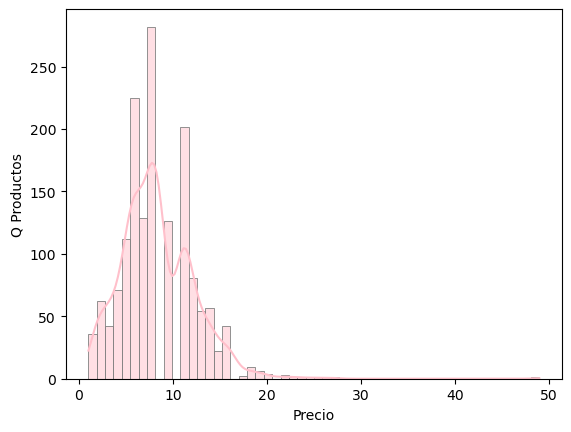

In [6]:
histo_precios= sns.histplot(x = "price", data = df_mer, kde= True, edgecolor= 'grey', color = "pink");
plt.xlabel("Precio")
plt.ylabel("Q Productos")

Interpretación= 
Los precios se distribuyen de la siguiente forma:
    - Encontramos un pico marcado de cantidad de productos a unos 8 euros. 
    - Otros dos precios a destacar que mas procutos tienen son 5-6 euros y 12-13 euros. 
    - A destacar que baja draticamente la cantidad de productos que superan los 20 euros.
    - existen precios que no existen en nimngun producto como 9 euros, 11 euros y 16 euros.
    - Vemos una mayor concentracion de precios hacia la izq y baja más rapidamente conforme se va encareciendo el producto. 

In [7]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

See the :ref:`tutorial <categorical_tutorial>` for more i

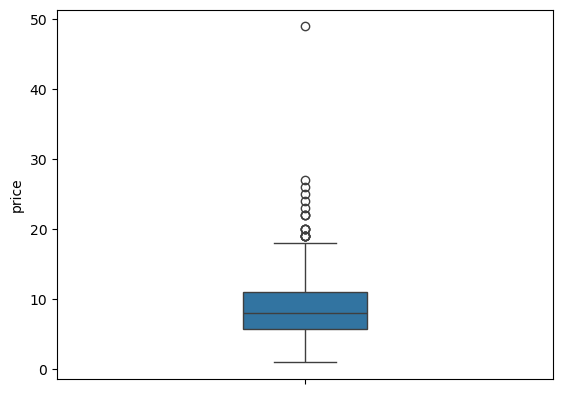

In [8]:
boxplot= sns.boxplot(y='price', width=0.25, data=df_mer)

Interpretacion: 
- Con el boxplot podemos darnos cuenta de que existen precios altos aislados que no se visualizaban tan bien en el histograma.
- Todos los valores que esten por encima de 18-19 euros son potenciales outliers o "datos atipicos" que nos podrian afectar a las estimaciones y tendriamos que tenerlos en cuenta. 

# ¿Cuál es la relación entre el precio y la calificación promedio de los productos?

In [9]:
df_mer['avg_rating']= (df_mer['rating_one_count']*1+df_mer['rating_two_count']*2+
                                                     df_mer['rating_three_count']*3+df_mer['rating_four_count']*4+
                                                     df_mer['rating_five_count']*5)/(df_mer['rating_one_count']+
                                                                                     df_mer['rating_two_count']+
                                                                                      df_mer['rating_three_count']+df_mer['rating_four_count']+
                                                                                      df_mer['rating_five_count'])

In [10]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count',
       'avg_rating'],
      dtype='object')

In [11]:
df_mer['avg_rating'].head()

0    3.759259
1    3.451019
2    3.828283
3    3.765957
4    2.857143
Name: avg_rating, dtype: float64

In [13]:
df_mer['avg_rating'].describe()

count    1573.000000
mean        3.788823
std         0.474195
min         1.000000
25%         3.545455
50%         3.850277
75%         4.080090
max         5.000000
Name: avg_rating, dtype: float64

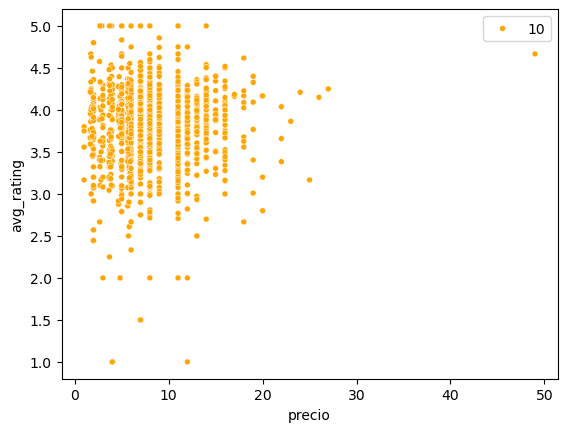

In [48]:
scatterplot= sns.scatterplot(x = "price", 
                y = "avg_rating", 
                data = df_mer, 
                size = 10, 
                marker= "o", 
                color = "orange")
plt.xlabel("precio")
plt.ylabel("avg_rating");

<Axes: xlabel='price', ylabel='avg_rating'>

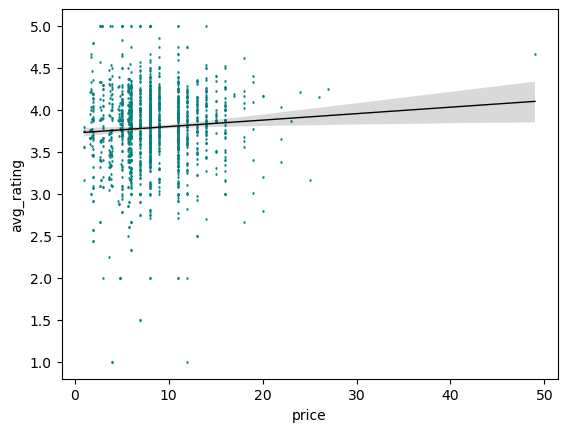

In [49]:
sns.regplot(x = "price", 
            y = "avg_rating", 
            data = df_mer, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

Interpretación=
- Tiene una cierta tendencia positiva pero no es reseñable.

# ¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (uses_ad_boosts) o no?

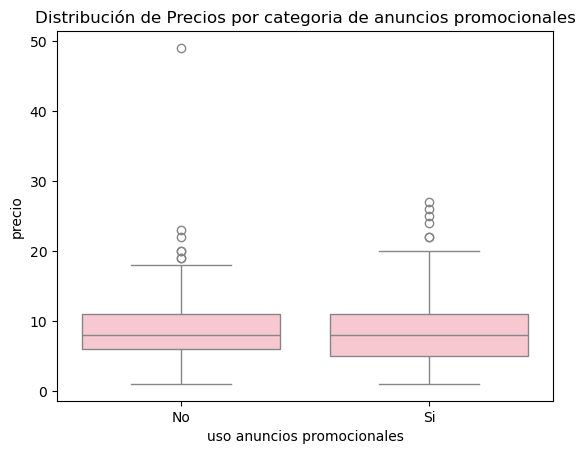

In [52]:
sns.boxplot(x= 'uses_ad_boosts', y='price', data=df_mer, color= 'pink')
plt.title('Distribución de Precios por categoria de anuncios promocionales')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

Interpretación=
- el 50% central de los precios de la categoria 'No' está mas concentrado que los de la categoria 'si'.
- Hay un comportamiento extraño en la categoria no, con un outlier muy alejado. 
- Tambien encontramos valores atipicos en la categoria si.
- El minimo de las dos categorias parece concentrarse en un precio similar, así como la mediana. 

# ¿Existe una relación entre el uso de anuncios y las unidades vendidas?

In [53]:
df_mer.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count',
       'avg_rating'],
      dtype='object')

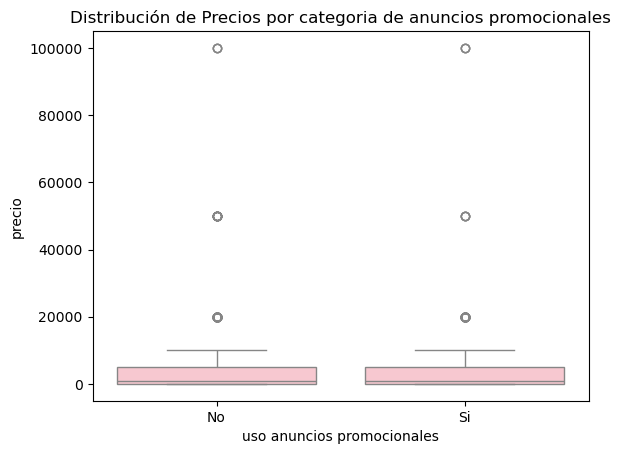

In [ ]:
sns.boxplot(x= 'uses_ad_boosts', y='units_sold', data=df_mer, color= 'pink')
plt.title('Relacion uso anuncio-unidades vendidas')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

Interpretacion=
- Parecen tener ambas categorias el mismo comportamiento y no parece tener relacion ninguna.

<Axes: xlabel='units_sold', ylabel='price'>

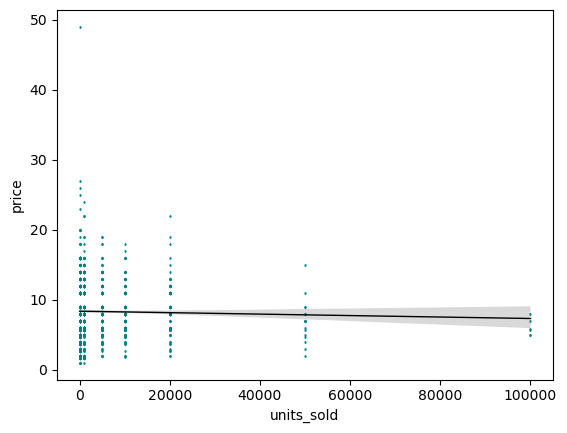

In [57]:
sns.regplot(x = "units_sold", 
            y = "price", 
            data = df_mer, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1})

# ¿Cuál es la relación entre el precio de envío y las unidades vendidas?

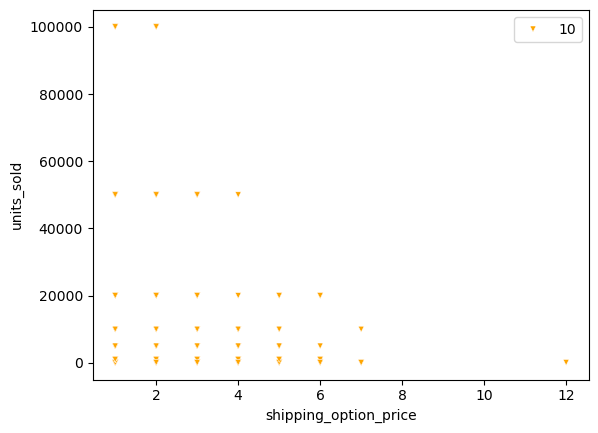

In [59]:
sns.scatterplot(y = "units_sold", 
                x = "shipping_option_price", 
                data = df_mer, 
                size = 10, 
                marker= "v", 
                color = "orange")


# cambiamos los nombres de los ejes
plt.xlabel("shipping_option_price")
plt.ylabel("units_sold");

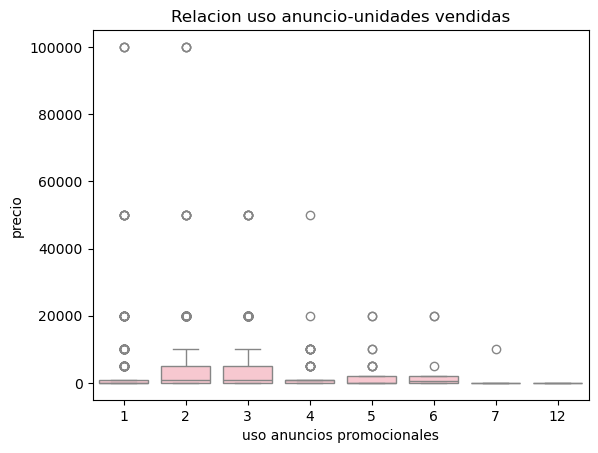

In [ ]:
sns.boxplot(x= 'shipping_option_price', y='units_sold', data=df_mer, color= 'pink')
plt.title('Relacion uso anuncio-unidades vendidas')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

Observaciones:
- 

#¿Cuál es la distribución de las calificaciones de los empleados (rating_employee) para los productos que tienen el distintivo "Buena calidad del producto" (badge_product_quality) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes.

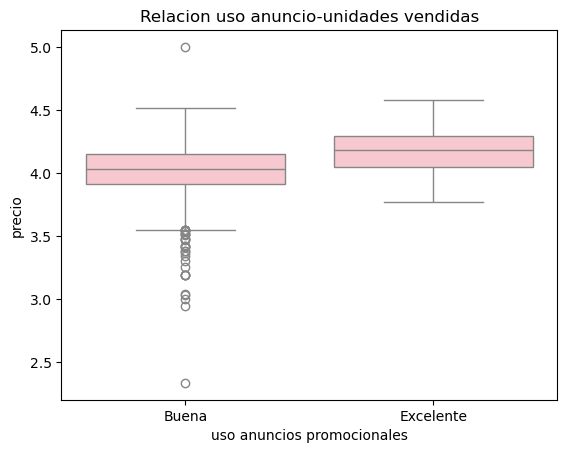

In [18]:
sns.boxplot(x= 'badge_product_quality', y='rating_employee', data=df_mer, color= 'pink')
plt.title('Relacion uso anuncio-unidades vendidas')
plt.ylabel('precio')
plt.xlabel('uso anuncios promocionales')
plt.show()

<Axes: xlabel='rating_employee', ylabel='Density'>

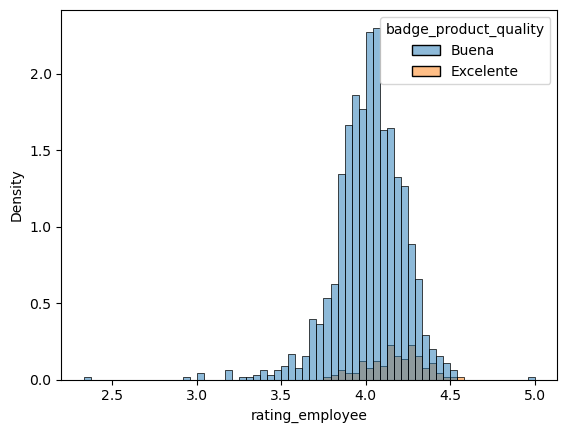

In [22]:
sns.histplot(df_mer, x="rating_employee", hue="badge_product_quality", stat="density")
# Extra: , element="step"

# Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto".

Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")